In [2]:
#knn collaborative filtering

import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with the consolidated stock data
# Load your data into a pandas DataFrame
data = pd.read_csv(R"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")
# Convert the 'DATE' column to a datetime object with the correct format
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%Y/%d')


# Pivot the table to make tickers become columns, and dates become the index
pivot_data = data.pivot_table(index='DATE', columns='TICKER', values='VALUE')

# Normalize the data - important for kNN
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_data.fillna(0))

# Now, pivot_scaled is a numpy array with normalized prices for each stock on each date
# We can create a NearestNeighbors model to find similar stocks
model = NearestNeighbors(n_neighbors=5, metric='euclidean')
model.fit(pivot_scaled.T)  # Transpose so that we get similarities between stocks

# To find the stocks most similar to a particular stock
# Let's say we want to find stocks similar to the stock with the ticker 'A'
ticker_index = list(pivot_data.columns).index('A')  # Get the index of ticker 'A'
distances, indices = model.kneighbors([pivot_scaled.T[ticker_index]])

# Get the ticker symbols of the nearest neighbors
similar_tickers = pivot_data.columns[indices.flatten()].tolist()

print(f"Stocks similar to 'A': {similar_tickers}")


Stocks similar to 'A': ['A', 'ISD', 'EVG', 'MS', 'HCA']


In [6]:
#similarity among all stocks using knn collaborative filtering.
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Load your data into a pandas DataFrame
data = pd.read_csv(R"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")

# Convert the 'DATE' column to a datetime object for easier manipulation
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%Y/%d')

# Define a consistent set of tickers
consistent_tickers = sorted(list(set(data['TICKER'])))

# Pivot the table to make tickers become columns, and dates become the index
# Ensure that you only use the consistent set of tickers and fill NA values
pivot_data = data.pivot_table(index='DATE', columns='TICKER', values='VALUE', aggfunc='mean')[consistent_tickers].fillna(0)

# Normalize the data - important for kNN
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_data)

# Fit the NearestNeighbors model on the transposed scaled data
model = NearestNeighbors(n_neighbors=5, metric='euclidean')
model.fit(pivot_scaled.T)  # Transpose so that we get similarities between stocks

# Loop through each ticker to find its nearest neighbors
for ticker in consistent_tickers:
    # Get the index of the ticker in the columns list
    ticker_index = list(pivot_data.columns).index(ticker)
    # Find the nearest neighbors for this ticker
    distances, indices = model.kneighbors(pivot_scaled.T[ticker_index].reshape(1, -1))
    # Get the ticker symbols of the nearest neighbors
    neighbors = [pivot_data.columns[i] for i in indices.flatten() if i != ticker_index]
    # Print the neighbors
    print(f"Stocks similar to '{ticker}': {neighbors}")



Stocks similar to 'A': ['ISD', 'EVG', 'MS', 'HCA']
Stocks similar to 'AA': ['X', 'HPQ', 'MTW', 'IPG']
Stocks similar to 'AAIC': ['HOV', 'GNW', 'MLP', 'FBP']
Stocks similar to 'AAP': ['MATV', 'BOH', 'BKE', 'CBU']
Stocks similar to 'AAT': ['DBRG', 'BFH', 'CBU', 'SMP']
Stocks similar to 'AB': ['BDJ', 'SPXX', 'DSU', 'GLP']
Stocks similar to 'ABBV': ['MRK', 'GPC', 'PG', 'KO']
Stocks similar to 'ABEV': ['AEG', 'AKO-B', 'GFI', 'TECK']
Stocks similar to 'ABG': ['V', 'FICO', 'FI', 'WMS']
Stocks similar to 'ABM': ['AVY', 'GHC', 'AVK', 'UTF']
Stocks similar to 'ABR': ['SCM', 'PNNT', 'BGH', 'BGB']
Stocks similar to 'ABT': ['BDX', 'BMI', 'DUK', 'FI']
Stocks similar to 'AC': ['IHIT', 'EQBK', 'RM', 'CUBI_F']
Stocks similar to 'ACCO': ['MCS', 'CPRI', 'MGM', 'NOK']
Stocks similar to 'ACEL': ['AHT_H', 'CHMI_A', 'RLJ_A', 'KIM_L']
Stocks similar to 'ACM': ['H', 'AGCO', 'VOYA', 'ATKR']
Stocks similar to 'ACN': ['IEX', 'RPM', 'APH', 'AME']
Stocks similar to 'ACP': ['HIX', 'RCS', 'JPS', 'JHI']
Stocks similar

In [9]:
import numpy as np

# Assuming 'model' is your trained NearestNeighbors model
# and 'pivot_scaled' is your scaled data with stocks as rows

mean_distances = []

# Loop over each stock to calculate the mean distance to its neighbors
for i in range(pivot_scaled.T.shape[0]):  # looping over stocks
    distances, _ = model.kneighbors([pivot_scaled.T[i]])  # pass in the stock's features as a single sample
    mean_distances.append(np.mean(distances))

mean_distances = np.array(mean_distances)

# Now you can print or analyze the mean distances
# For example, you might look at the distribution of mean distances to assess the model




In [10]:
print(mean_distances)

[11.11925879  7.81369773  6.29853309 ...  8.40720357  5.99659683
 11.70524866]


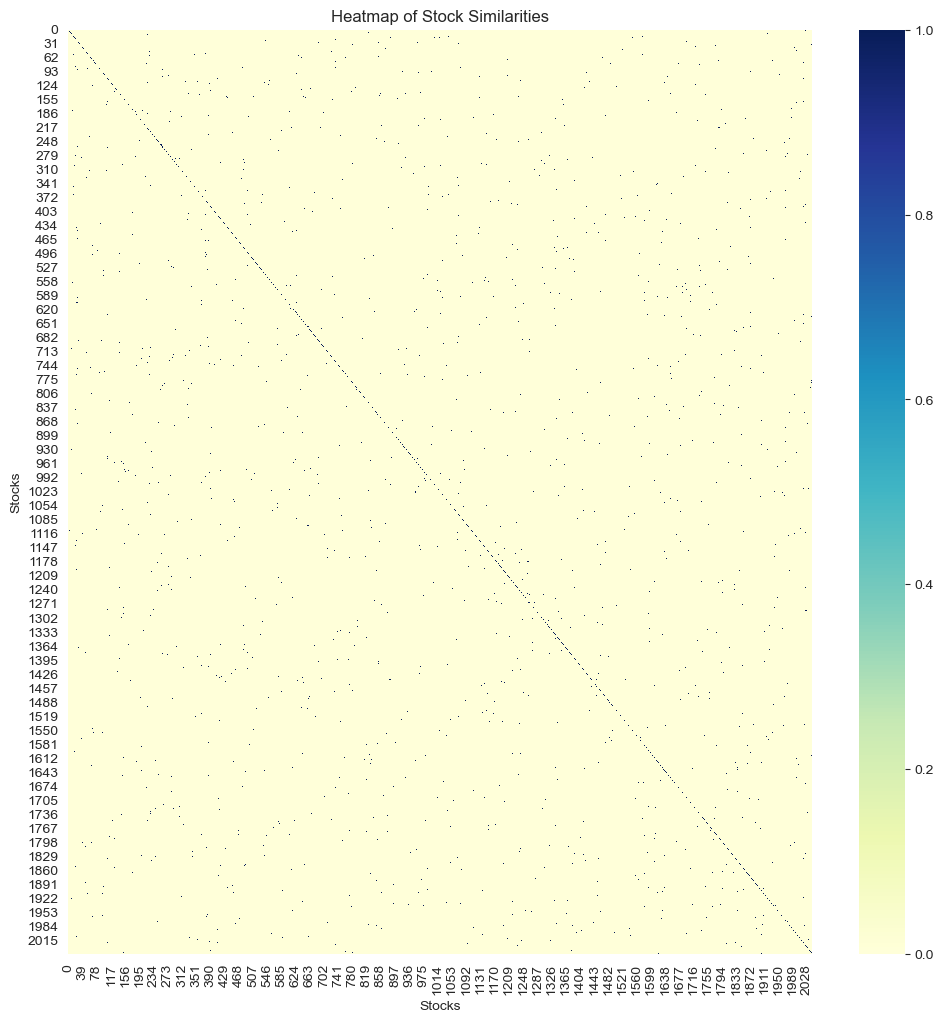

In [4]:
#visualization heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Create the similarity matrix using the NearestNeighbors model's kneighbors_graph method
similarity_matrix = model.kneighbors_graph(pivot_scaled.T).toarray()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(similarity_matrix, cmap='YlGnBu')
plt.title('Heatmap of Stock Similarities')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()


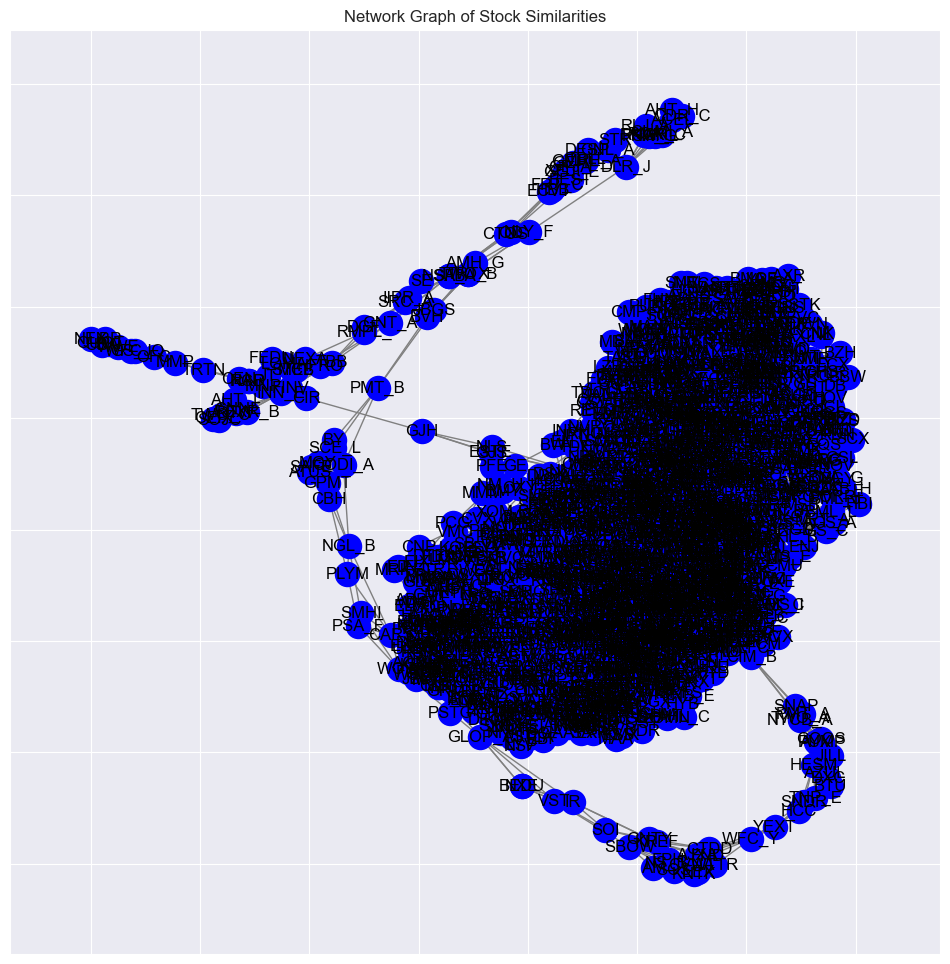

In [5]:
#Network graph
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges from the stock_neighbors dictionary
for ticker, neighbors in stock_neighbors.items():
    for neighbor in neighbors:
        G.add_edge(ticker, neighbor)

# Draw the network graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, node_color='blue', edge_color='gray')
plt.title('Network Graph of Stock Similarities')
plt.show()


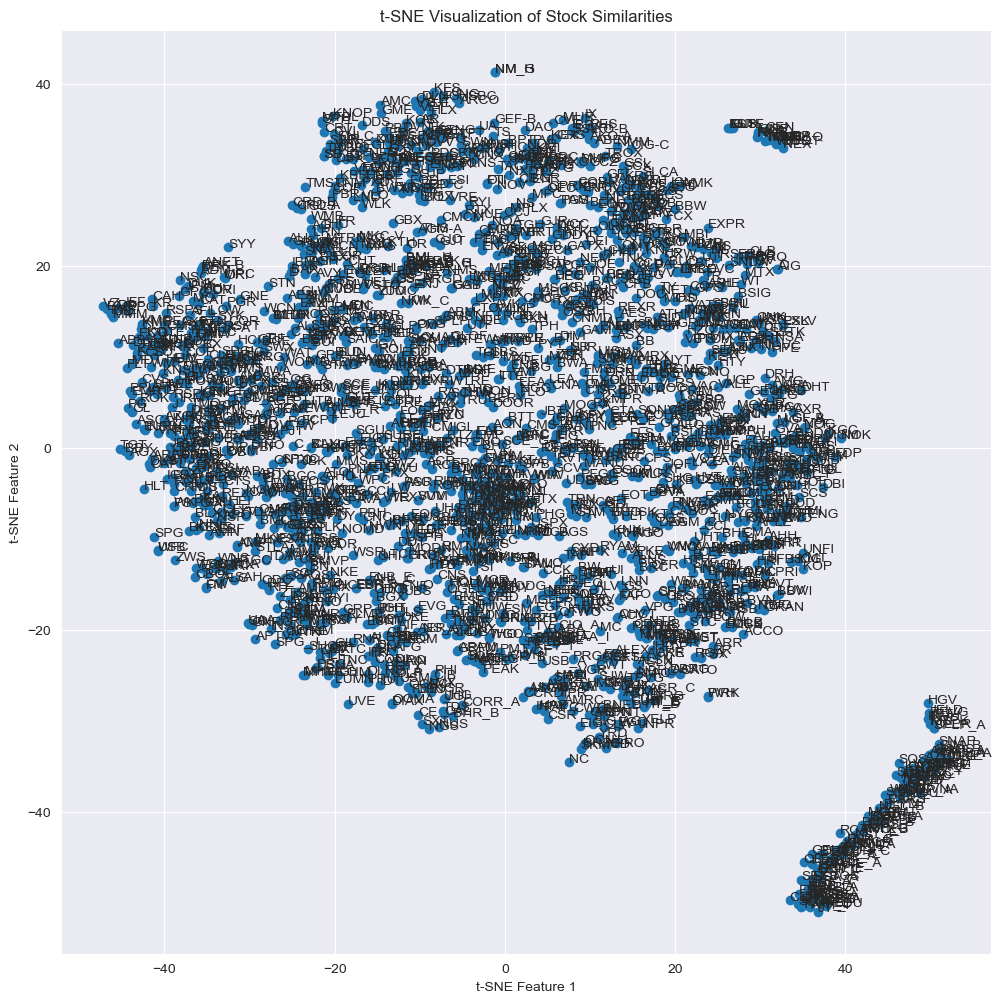

In [6]:
from sklearn.manifold import TSNE

# Use t-SNE to reduce dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(pivot_scaled.T)

# Plot the result of t-SNE
plt.figure(figsize=(12, 12))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
for i, ticker in enumerate(pivot_data.columns):
    plt.annotate(ticker, (tsne_results[i, 0], tsne_results[i, 1]))
plt.title('t-SNE Visualization of Stock Similarities')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


In [11]:
#NFM based collaborative filtering
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with the consolidated stock data
# Load your data into a pandas DataFrame
data = pd.read_csv(R"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")

# Convert the 'DATE' column to a datetime object for easier manipulation
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%Y/%d')

# Pivot the table to make tickers become columns, and dates become the index
pivot_data = data.pivot_table(index='DATE', columns='TICKER', values='VALUE').fillna(0)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
pivot_scaled = scaler.fit_transform(pivot_data)

# Apply NMF
nmf = NMF(n_components=5, init='random', random_state=0)
W = nmf.fit_transform(pivot_scaled)  # User (date) features matrix
H = nmf.components_                # Item (stock) features matrix


# Now you can use the W and H matrices to find similar stocks
# For example, we can calculate the cosine similarity between the feature vectors of stocks
from sklearn.metrics.pairwise import cosine_similarity

stock_features = H.T
stock_similarity = cosine_similarity(stock_features)

# Convert to DataFrame for easier handling
stock_similarity_df = pd.DataFrame(stock_similarity, index=pivot_data.columns, columns=pivot_data.columns)

# Now you can look at the similarity between stocks
# Let's look at the top 5 similar stocks to 'A'
similar_stocks = stock_similarity_df['A'].sort_values(ascending=False)[1:6]

print(similar_stocks)


TICKER
PKE     0.998461
CIB     0.994985
FAF     0.992747
MLR     0.992003
PFLT    0.991571
Name: A, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [12]:
from sklearn.metrics import mean_squared_error

# Reconstruct the ratings matrix from the factorized matrices
reconstructed_pivot = np.dot(W, H)

# Calculate the reconstruction error
error = mean_squared_error(pivot_scaled, reconstructed_pivot, squared=False)
print(f"Reconstruction error (RMSE): {error}")


Reconstruction error (RMSE): 0.09405479119052293


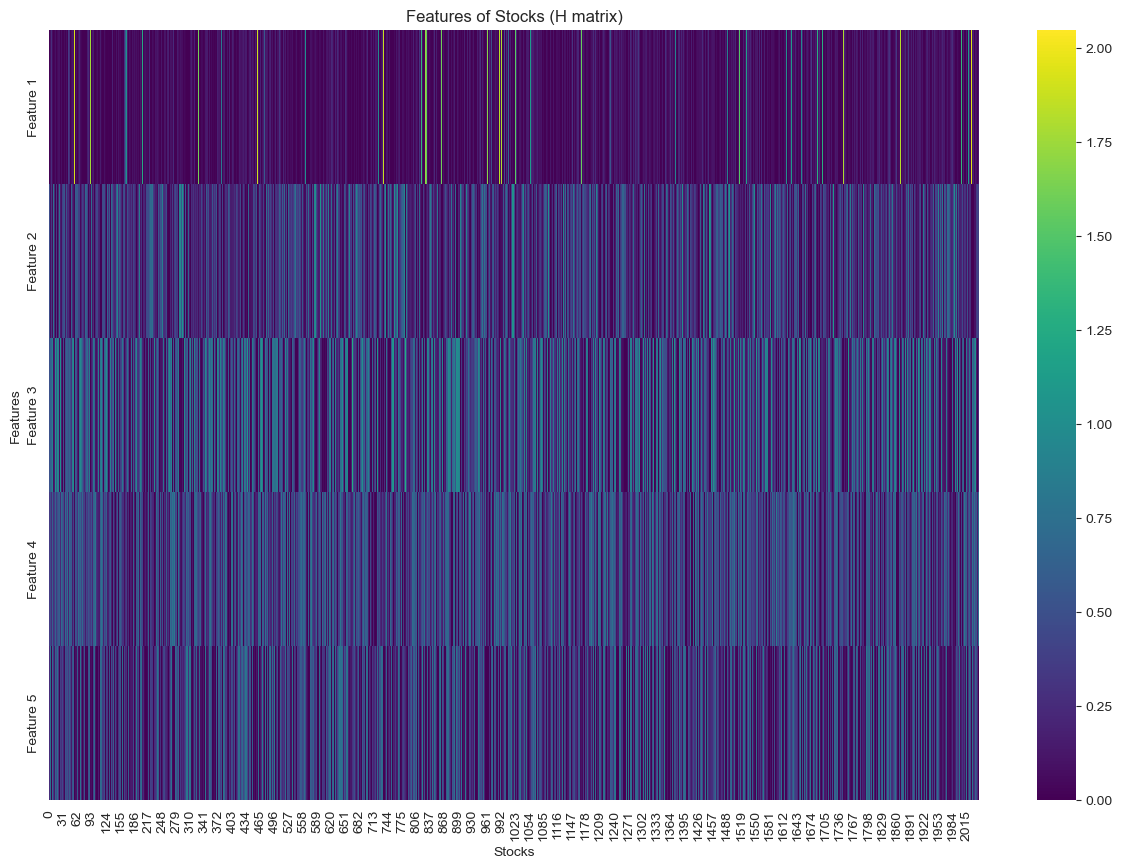

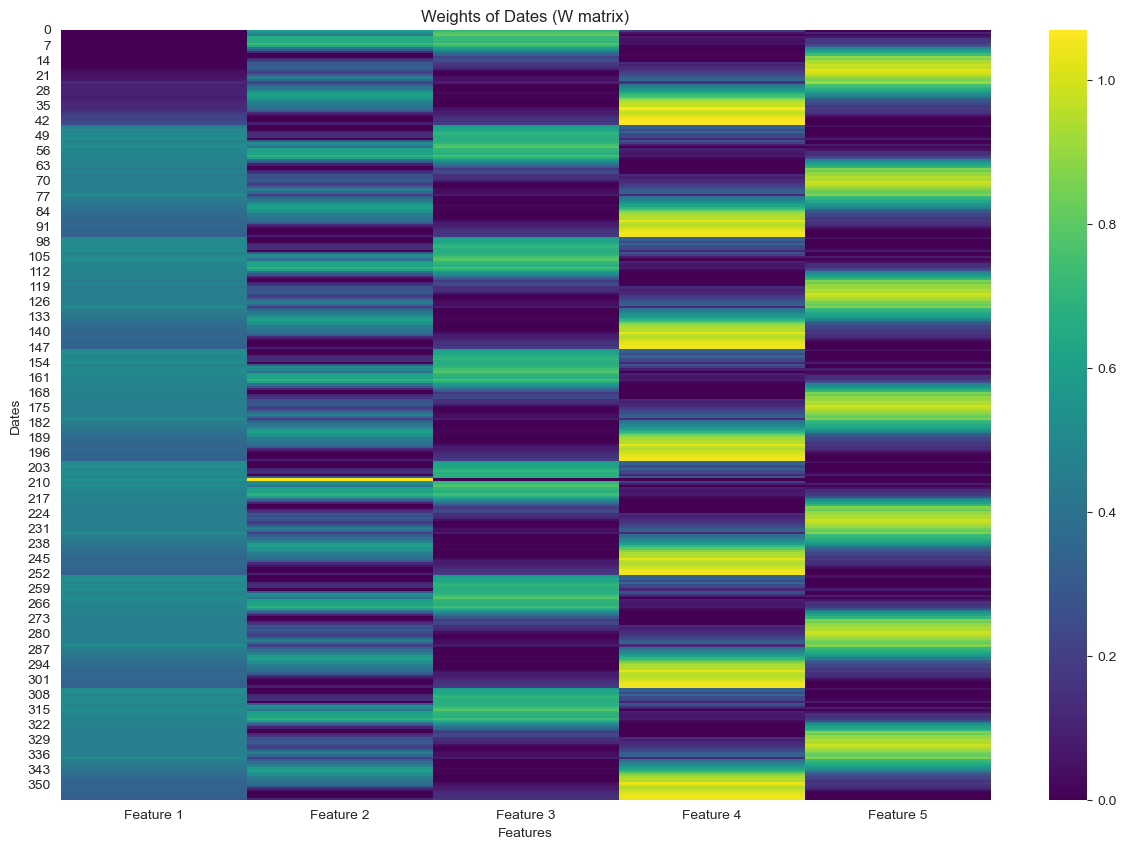

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for the Features (H matrix)
plt.figure(figsize=(15, 10))
sns.heatmap(H, cmap='viridis', yticklabels=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
plt.title('Features of Stocks (H matrix)')
plt.xlabel('Stocks')
plt.ylabel('Features')
plt.show()

# Heatmap for the Weights (W matrix)
plt.figure(figsize=(15, 10))
sns.heatmap(W, cmap='viridis', xticklabels=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
plt.title('Weights of Dates (W matrix)')
plt.xlabel('Features')
plt.ylabel('Dates')
plt.show()


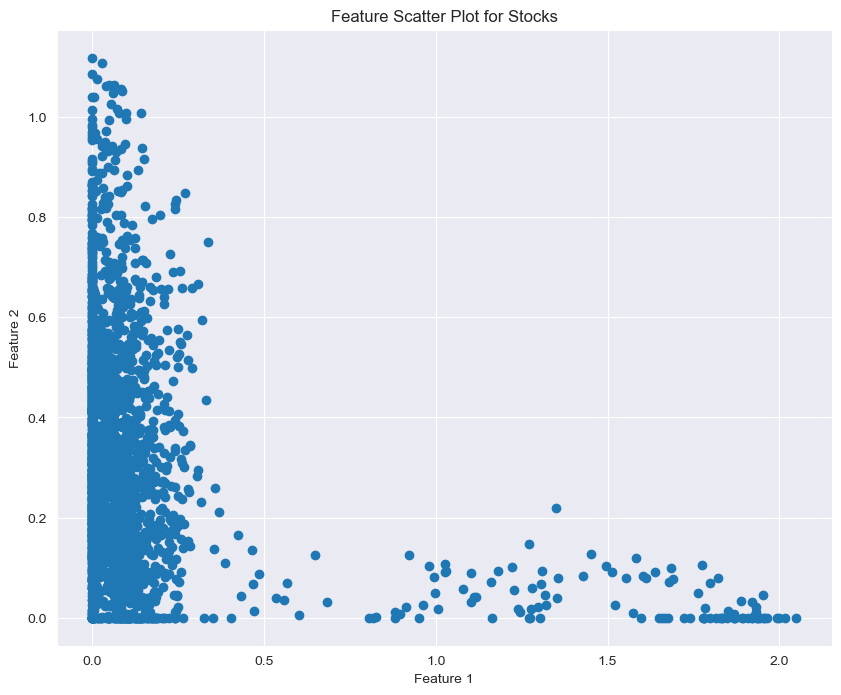

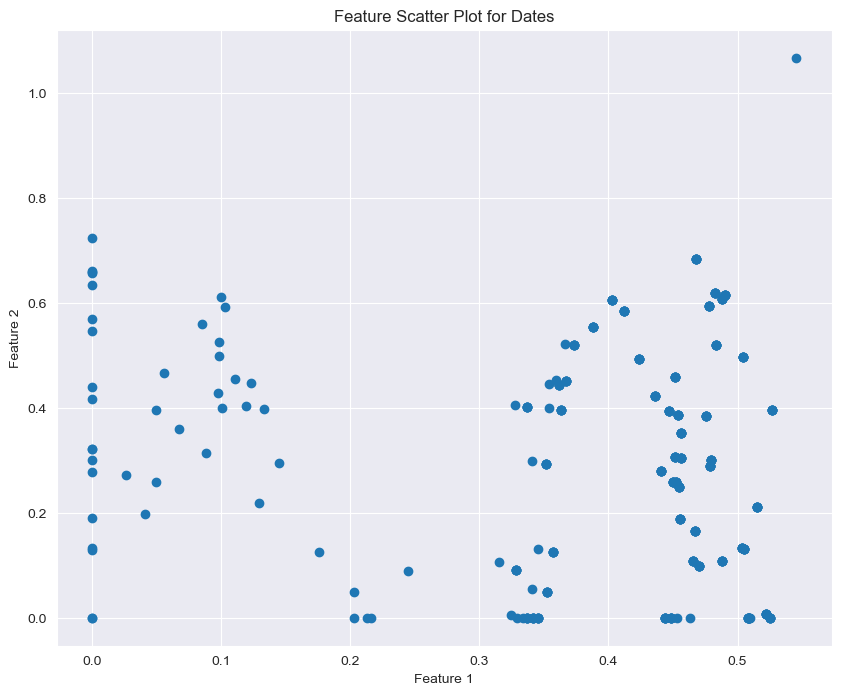

In [10]:
# Scatter plot for the first two features of stocks
plt.figure(figsize=(10, 8))
plt.scatter(H[0], H[1])
plt.title('Feature Scatter Plot for Stocks')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Scatter plot for the first two features of dates
plt.figure(figsize=(10, 8))
plt.scatter(W[:, 0], W[:, 1])
plt.title('Feature Scatter Plot for Dates')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


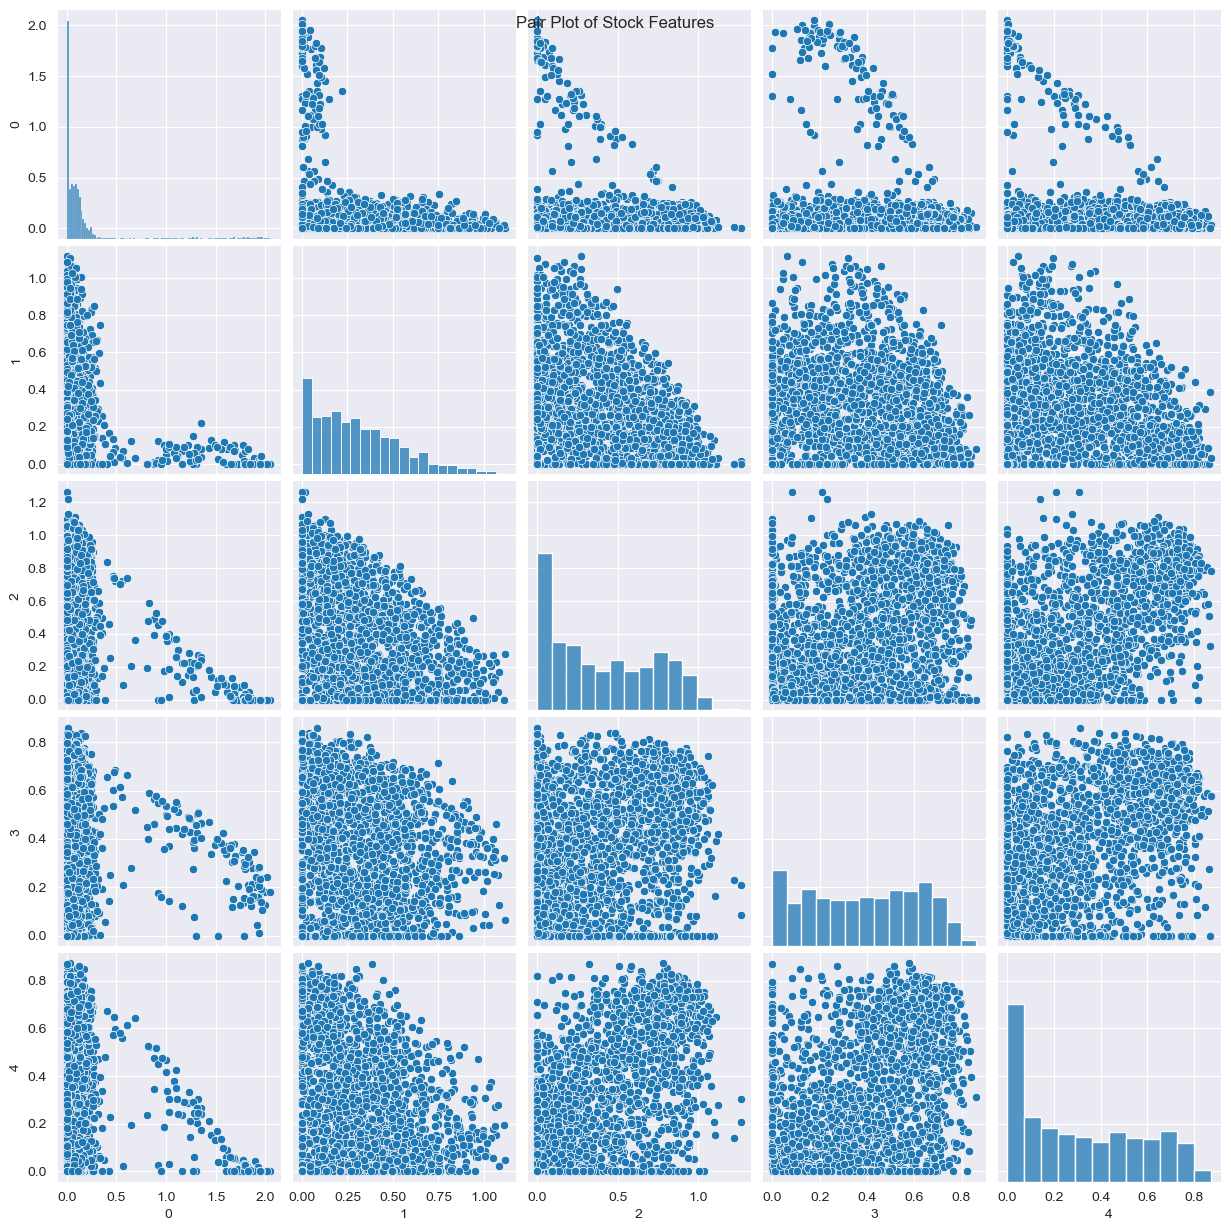

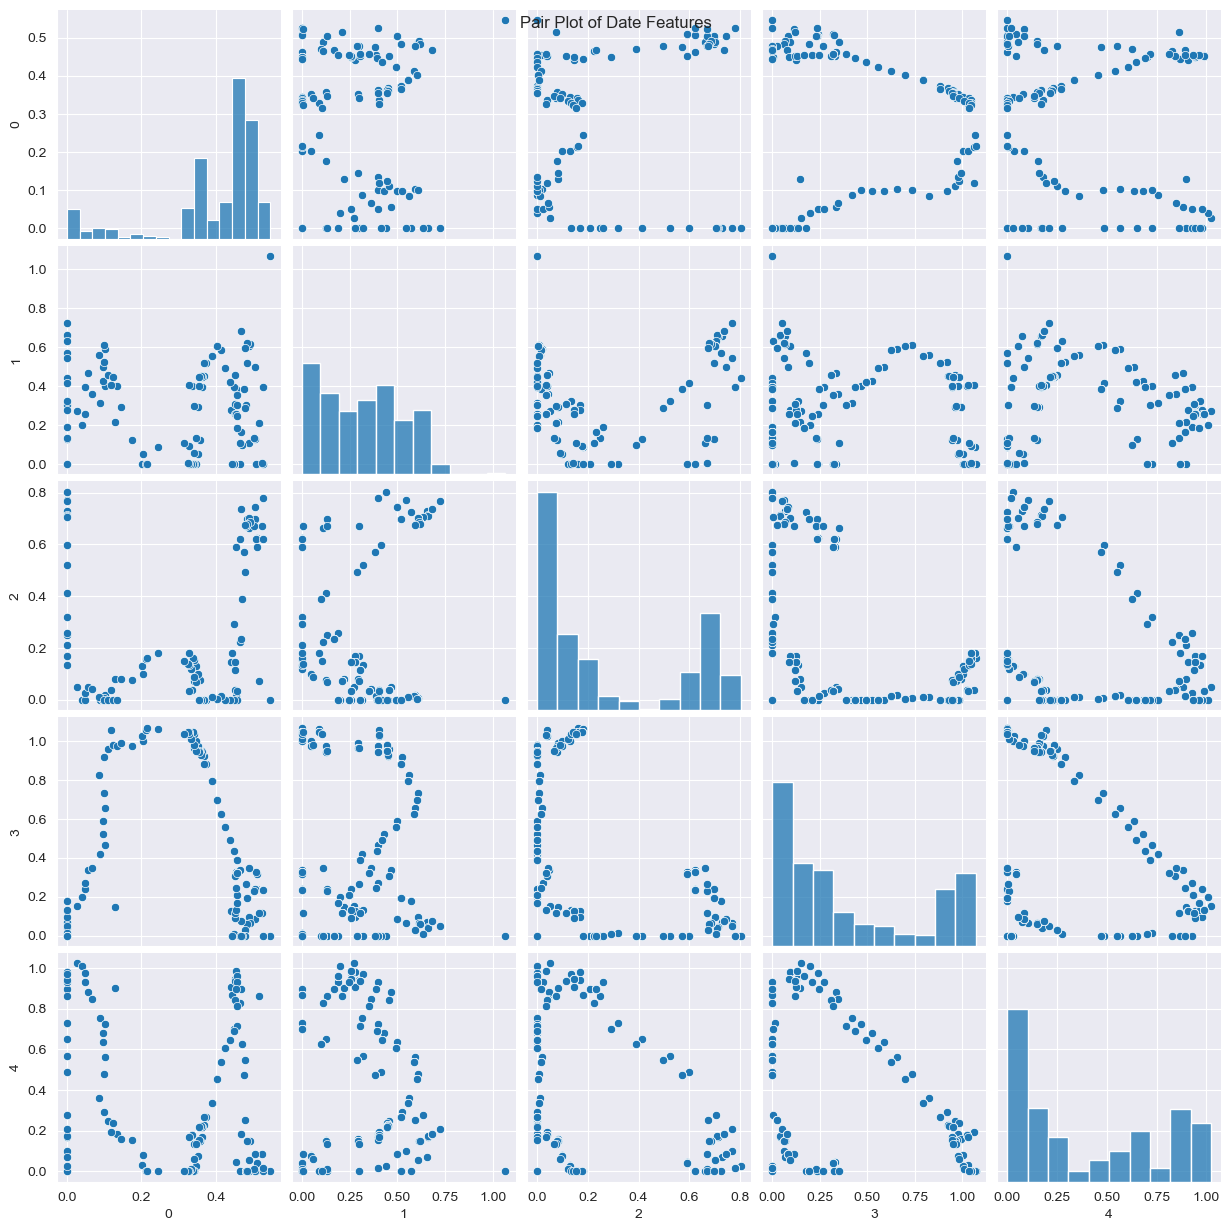

In [11]:
import seaborn as sns

# Pair plot for the H matrix (stocks' features)
sns.pairplot(pd.DataFrame(H.T))
plt.suptitle('Pair Plot of Stock Features', verticalalignment='top')
plt.show()

# Pair plot for the W matrix (dates' features)
sns.pairplot(pd.DataFrame(W))
plt.suptitle('Pair Plot of Date Features', verticalalignment='top')
plt.show()


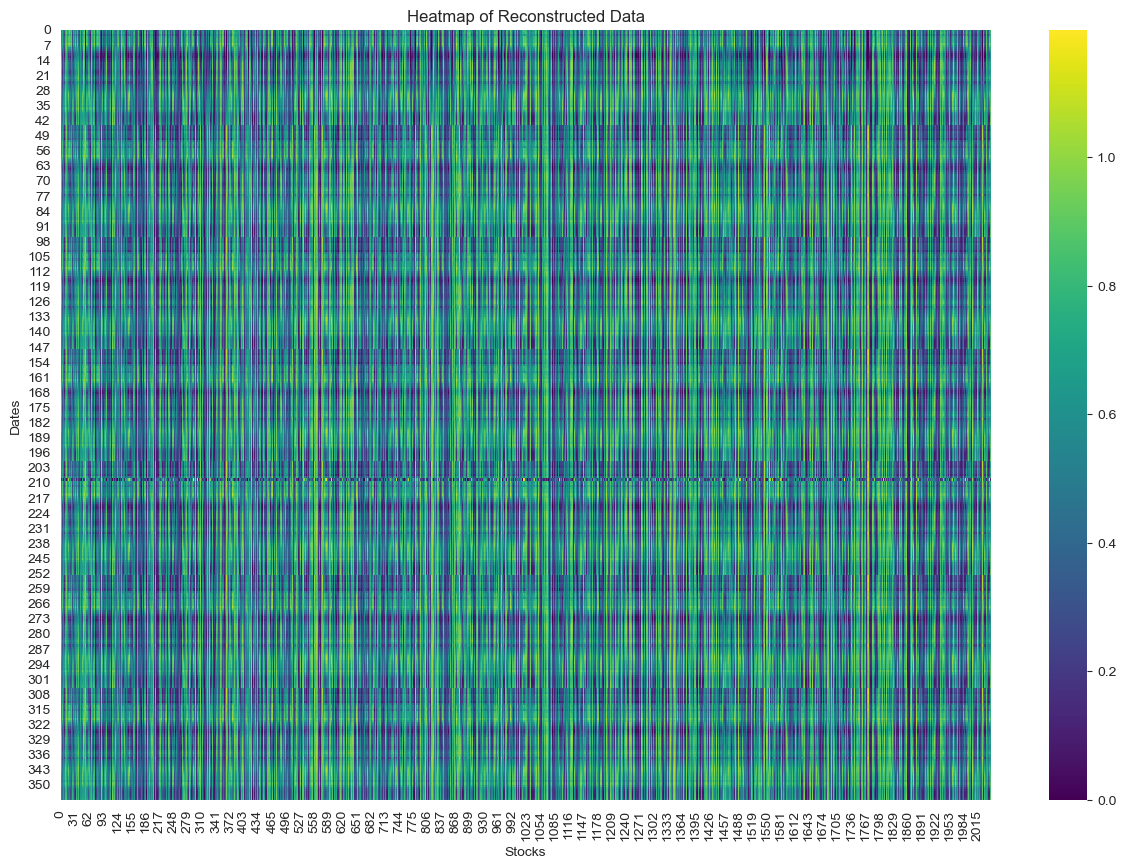

In [13]:
# Reconstruction
import numpy as np
reconstructed_data = np.dot(W, H)

# Heatmap of the reconstructed matrix
plt.figure(figsize=(15, 10))
sns.heatmap(reconstructed_data, cmap='viridis')
plt.title('Heatmap of Reconstructed Data')
plt.xlabel('Stocks')
plt.ylabel('Dates')
plt.show()


In [20]:
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot
from keras.optimizers import Adam

# Load data
data = pd.read_csv(r"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")

# Preprocessing
# Ensure the DATE column is in the correct format and is parsed as a date
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%Y/%d')

# Check and fill NaN values for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data.mean())

# Check and handle infinite values for numeric columns
for column in numeric_columns:
    data[column].replace([np.inf, -np.inf], np.nan, inplace=True)
data[numeric_columns] = data[numeric_columns].fillna(data.mean())




# Create a unique index for dates (users) and stocks (items)
data['user_id'] = data['DATE'].astype('category').cat.codes
data['item_id'] = data['TICKER'].astype('category').cat.codes

# Number of users and items
n_users = data['user_id'].nunique()
n_items = data['item_id'].nunique()

# Neural network architecture
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(output_dim=15, input_dim=n_users, input_length=1, embeddings_initializer='he_normal', name='user_embedding')(user_input)
item_embedding = Embedding(output_dim=15, input_dim=n_items, input_length=1, embeddings_initializer='he_normal', name='item_embedding')(item_input)

user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

product = Dot(axes=1)([user_vecs, item_vecs])

model = Model(inputs=[user_input, item_input], outputs=product)
model.compile(optimizer=Adam(0.0001), loss='mean_squared_error')  # Reduced learning rate

# Convert DataFrame columns to numpy arrays for training
user_ids = data['user_id'].values
item_ids = data['item_id'].values
values = data['VALUE'].values

# Train the model
model.fit([user_ids, item_ids], values, epochs=10, batch_size=128, verbose=1)

# Save model in TensorFlow SavedModel format
model.save(r"C:\Users\haziq\Downloads\d_us_txt\model1.h5")  # The '.h5' extension is not needed

# To predict, make sure to convert the input to the proper format as shown above
# For example:
# user_id_to_predict = np.array([some_user_id])
# item_id_to_predict = np.array([some_item_id])
# prediction = model.predict([user_id_to_predict, item_id_to_predict])


C:\Users\haziq\AppData\Local\Temp\ipykernel_12808\3654920517.py:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data[numeric_columns] = data[numeric_columns].fillna(data.mean())
C:\Users\haziq\AppData\Local\Temp\ipykernel_12808\3654920517.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numeric_columns] = data[numeric_columns].fillna(data.mean())
C:\Users\haziq\AppData\Local\Temp\ipykernel_12808\3654920517.py:21: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data[numeric_columns] = data[numeric_columns].fillna(data.mean())


Epoch 1/10


C:\Users\haziq\AppData\Local\Temp\ipykernel_12808\3654920517.py:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numeric_columns] = data[numeric_columns].fillna(data.mean())


5673/5673 [==============================] - 4s 588us/step - loss: 7197815.5000
Epoch 2/10
5673/5673 [==============================] - 3s 585us/step - loss: 7197798.5000
Epoch 3/10
5673/5673 [==============================] - 3s 583us/step - loss: 7197793.5000
Epoch 4/10
5673/5673 [==============================] - 3s 584us/step - loss: 7197763.5000
Epoch 5/10
5673/5673 [==============================] - 3s 598us/step - loss: 7197745.0000
Epoch 6/10
5673/5673 [==============================] - 3s 592us/step - loss: 7197692.0000
Epoch 7/10
5673/5673 [==============================] - 4s 624us/step - loss: 7197621.5000
Epoch 8/10
5673/5673 [==============================] - 4s 655us/step - loss: 7197531.0000
Epoch 9/10
5673/5673 [==============================] - 4s 689us/step - loss: 7197437.5000
Epoch 10/10
5673/5673 [==============================] - 4s 627us/step - loss: 7197323.0000


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with the consolidated stock data

# Create a unique index for dates (users) and stocks (items)
data['user_id'] = data['DATE'].astype('category').cat.codes
data['item_id'] = data['TICKER'].astype('category').cat.codes

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Get the inputs and outputs for the training set
train_user_ids = train_data['user_id'].values
train_item_ids = train_data['item_id'].values
train_values = train_data['VALUE'].values

# Train the model
model.fit([train_user_ids, train_item_ids], train_values, epochs=10, batch_size=128, verbose=1)

# Get the inputs for the test set
test_user_ids = test_data['user_id'].values
test_item_ids = test_data['item_id'].values
test_values = test_data['VALUE'].values

# Evaluate the model on the test set
test_loss = model.evaluate([test_user_ids, test_item_ids], test_values)

# Predictions
# Use the trained model to predict values for the test set
predicted_values = model.predict([test_user_ids, test_item_ids])

# Compare the predicted values with the actual values
comparison_df = pd.DataFrame({'Actual': test_values, 'Predicted': predicted_values.flatten()})


Epoch 1/10
4538/4538 [==============================] - 3s 592us/step - loss: 7124759.0000
Epoch 2/10
4538/4538 [==============================] - 3s 583us/step - loss: 7124649.0000
Epoch 3/10
4538/4538 [==============================] - 3s 579us/step - loss: 7124526.5000
Epoch 4/10
4538/4538 [==============================] - 3s 590us/step - loss: 7124398.5000
Epoch 5/10
4538/4538 [==============================] - 3s 599us/step - loss: 7124258.5000
Epoch 6/10
4538/4538 [==============================] - 3s 591us/step - loss: 7124104.5000
Epoch 7/10
4538/4538 [==============================] - 3s 579us/step - loss: 7123948.0000
Epoch 8/10
4538/4538 [==============================] - 3s 580us/step - loss: 7123807.0000
Epoch 9/10
4538/4538 [==============================] - 3s 586us/step - loss: 7123629.0000
Epoch 10/10
4538/4538 [==============================] - 2s 454us/step


In [27]:
# Example date and ticker
example_date = '01/2019/30'  # Replace with your actual date
example_ticker = 'A'  # Replace with your actual ticker

# Convert the new date and ticker to user_id and item_id
# Make sure the date format matches the one used in your dataset
new_date = pd.to_datetime(example_date, format='%m/%Y/%d')
new_user_id = data[data['DATE'] == new_date]['user_id'].iloc[0] if not data[data['DATE'] == new_date].empty else None
new_item_id = data[data['TICKER'] == example_ticker]['item_id'].iloc[0] if not data[data['TICKER'] == example_ticker].empty else None

# Check if we found the user_id and item_id
if new_user_id is not None and new_item_id is not None:
    # Predict the value
    new_prediction = model.predict([[new_user_id], [new_item_id]])
    print(f"The predicted value for {example_ticker} on {new_date.strftime('%Y-%m-%d')} is: {new_prediction.flatten()[0]}")
else:
    print(f"Date '{example_date}' or ticker '{example_ticker}' was not found in the dataset.")


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'numpy.int16\'>"})'}), <class 'NoneType'>

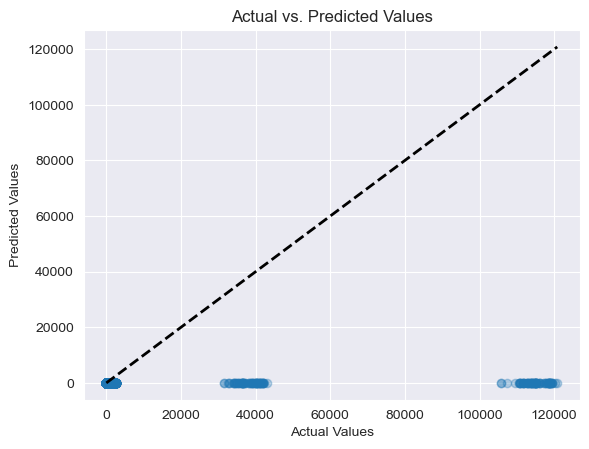

In [34]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.3)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


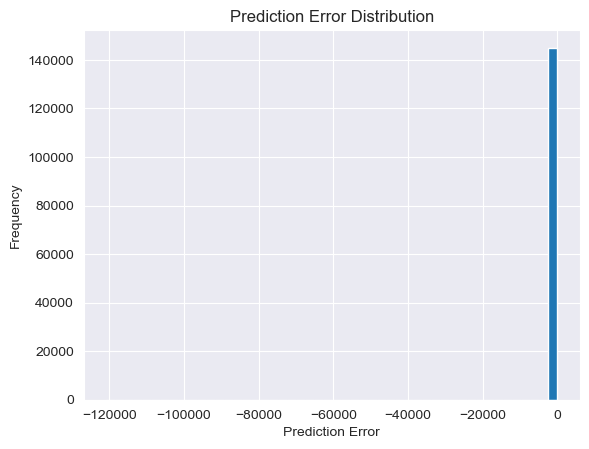

In [36]:
errors = comparison_df['Predicted'] - comparison_df['Actual']
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 107.59087773528057
Root Mean Squared Error: 2735.858314329662


In [ ]:
import seaborn as sns

# Assuming 'similarity_matrix' is a 2D numpy array representing the similarity between stocks
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f")
plt.title('Stock Similarity Heatmap')
plt.xlabel('Stock ID')
plt.ylabel('Stock ID')
plt.show()


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with the consolidated stock data
data = pd.read_csv(r"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")

# Keep only the necessary columns
content_data = data[['TICKER', 'VOL', 'VALUE']].copy()

# Group by 'TICKER' and aggregate the mean of 'VOL' and 'VALUE'
content_data = content_data.groupby('TICKER').agg({'VOL': 'mean', 'VALUE': 'mean'}).reset_index()

# Scale the features
scaler = StandardScaler()
content_scaled = scaler.fit_transform(content_data[['VOL', 'VALUE']])

# Compute the cosine similarity
similarity_matrix = cosine_similarity(content_scaled)

# Convert to DataFrame for better accessibility
similarity_df = pd.DataFrame(similarity_matrix, index=content_data['TICKER'], columns=content_data['TICKER'])


In [19]:
def get_recommendations_above_value(ticker, content_data, similarity_df, value_threshold, top_n=5):
    # Filter the content_data to get tickers with 'VALUE' above the threshold
    filtered_tickers = content_data[content_data['VALUE'] > value_threshold]['TICKER']

    # Check if the ticker is in the filtered tickers
    if ticker not in filtered_tickers.values:
        return []

    # Filter the similarity dataframe to keep only the filtered tickers
    filtered_similarity_df = similarity_df.loc[filtered_tickers, filtered_tickers]

    # Get the pairwise similarity scores of all stocks with that stock, within the filtered set
    sim_scores = filtered_similarity_df[ticker]

    # Sort the stocks based on the similarity scores
    sim_scores = sim_scores.sort_values(ascending=False)

    # Get the scores of the top-n most similar stocks
    most_similar_scores = sim_scores.iloc[1:top_n+1]

    # Return the top-n most similar stocks
    return most_similar_scores.index.tolist()

# Example usage:
value_threshold = 10  # Set the threshold value
ticker_of_interest = 'AA'  # Replace with the ticker of interest
recommended_stocks = get_recommendations_above_value(ticker_of_interest, content_data, similarity_df, value_threshold)
print(f"Stocks similar to {ticker_of_interest} with VALUE above {value_threshold}: {recommended_stocks}")



Stocks similar to AA with VALUE above 10: ['DINO', 'WY', 'PHM', 'WEC', 'CP']


In [22]:
def calculate_precision_recall(test_set, recommendations):
    # Precision: proportion of recommended items that are relevant
    # Recall: proportion of relevant items that are recommended

    precision_list = []
    recall_list = []

    # Loop through the test set
    for ticker, true_positives in test_set.items():
        # Get recommendations for the ticker
        recommended_tickers = recommendations[ticker]

        # Calculate true positives
        true_positive_recs = set(recommended_tickers).intersection(set(true_positives))

        # Calculate precision and recall for this ticker
        precision = len(true_positive_recs) / len(recommended_tickers) if recommended_tickers else 0
        recall = len(true_positive_recs) / len(true_positives) if true_positives else 0

        precision_list.append(precision)
        recall_list.append(recall)

    # Calculate average precision and recall across all tickers
    average_precision = sum(precision_list) / len(precision_list)
    average_recall = sum(recall_list) / len(recall_list)

    return average_precision, average_recall

# Assuming you have a test set in the form of a dictionary
# Where each key is a stock ticker and each value is a list of true similar stocks
test_set = {
    'AA': ['A', 'AAIC', 'AAP'],
    'A': ['AA', 'AAIC', 'AAP'],
    # Add more tickers and their true positives here...
}

# Assuming 'recommendations' is a dictionary you've created with the recommender system
# Where each key is a stock ticker and each value is a list of recommended stocks
recommendations = {
    'AA': get_recommendations_above_value('AA', content_data, similarity_df, 10),
    'A': get_recommendations_above_value('A', content_data, similarity_df, 10),
    # Add more tickers and their recommendations here...
}

average_precision, average_recall = calculate_precision_recall(test_set, recommendations)
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")


Average Precision: 0.0
Average Recall: 0.0


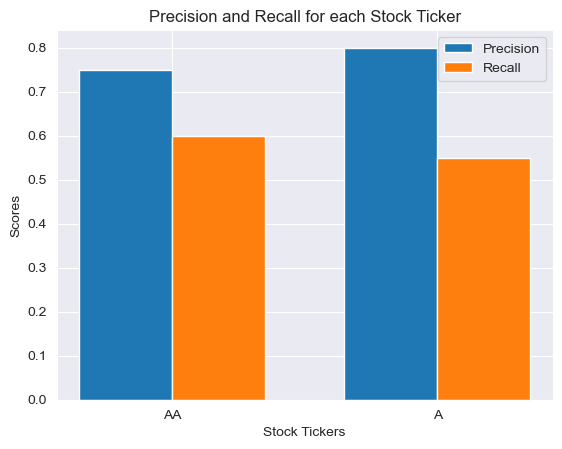

In [23]:
import matplotlib.pyplot as plt

# Let's assume you have the precision and recall for each stock ticker in a dictionary
metrics_per_ticker = {
    'AA': {'precision': 0.75, 'recall': 0.60},
    'A': {'precision': 0.80, 'recall': 0.55},
    # ... other tickers
}

# Splitting the dictionary into lists for plotting
tickers = list(metrics_per_ticker.keys())
precisions = [metrics_per_ticker[ticker]['precision'] for ticker in tickers]
recalls = [metrics_per_ticker[ticker]['recall'] for ticker in tickers]

# Set up the bar width
bar_width = 0.35

# Set up the index for the tickers
index = np.arange(len(tickers))

# Creating the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, precisions, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recalls, bar_width, label='Recall')

# Adding labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall for each Stock Ticker')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tickers)
ax.legend()

# Show the plot
plt.show()


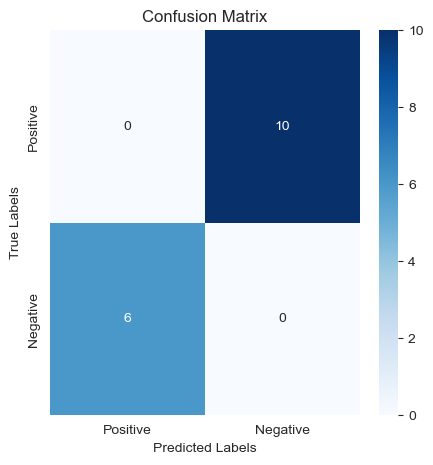

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def calculate_confusion_matrix_elements(test_set, recommendations):
    TP = FP = TN = FN = 0
    for ticker, true_positives in test_set.items():
        predicted_positives = recommendations.get(ticker, [])

        for true_positive in true_positives:
            if true_positive in predicted_positives:
                TP += 1
            else:
                FN += 1

        for predicted_positive in predicted_positives:
            if predicted_positive not in true_positives:
                FP += 1

        # Note: TN is not used here because in recommendation systems,
        # it's not clear what constitutes a true negative example.
        # TN would be relevant if we had a binary classification problem.

    return TP, FP, TN, FN

# Using the hypothetical test set and recommendations from previous examples
TP, FP, TN, FN = calculate_confusion_matrix_elements(test_set, recommendations)

# Now we create the confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()


In [37]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file
df = pd.read_csv(r"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")

# Handle missing values
df['VOL'].fillna(df['VOL'].median(), inplace=True)
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)

# Normalize the 'VOL' and 'VALUE' columns
scaler = MinMaxScaler()
df[['VOL', 'VALUE']] = scaler.fit_transform(df[['VOL', 'VALUE']])

# Define the recommendation function
def recommend_ticker(ticker, df, top_n=10):
    # Ensure the ticker is in the DataFrame
    if ticker not in df['TICKER'].values:
        return f"Ticker {ticker} not found in the dataset."

    # Get the index of the ticker of interest
    ticker_index = df.index[df['TICKER'] == ticker].tolist()[0]

    # Compute the cosine similarity for the selected ticker against all others
    ticker_features = df.loc[ticker_index, ['VOL', 'VALUE']].values.reshape(1, -1)
    all_features = df[['VOL', 'VALUE']].values
    similarity_scores = cosine_similarity(ticker_features, all_features).flatten()

    # Remove the provided ticker from the similarity scores
    similarity_scores[ticker_index] = -1

    # Get the indices of the top similar tickers
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    # Map the indices to ticker symbols
    recommended_tickers = df['TICKER'].iloc[top_indices].tolist()

    return recommended_tickers

# Replace 'AA' with the ticker symbol you want to find recommendations for
recommended_tickers = recommend_ticker('AA', df)
print(recommended_tickers)




['EW', 'EW', 'EW', 'AA', 'AA', 'AA', 'AA', 'EW', 'AA', 'EW']


In [39]:
def evaluate_precision(recommended_tickers, ground_truth):
    # Calculate the number of correct recommendations
    correct_recommendations = set(recommended_tickers).intersection(set(ground_truth))

    # Precision is the number of correct recommendations divided by the total number of recommendations
    precision = len(correct_recommendations) / len(recommended_tickers)

    return precision

# Example usage:
ground_truth = ['Ticker1', 'Ticker2', 'Ticker3']  # Replace with actual similar tickers for 'AA'
recommended_tickers = recommend_ticker('AA', df)
precision = evaluate_precision(recommended_tickers, ground_truth)
print(f"Precision for 'A': {precision}")


Precision for 'A': 0.0


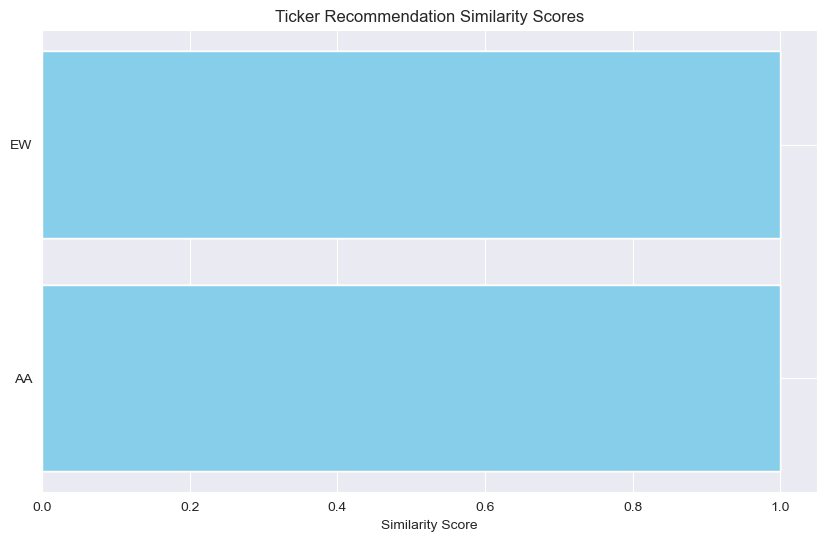

In [40]:
import matplotlib.pyplot as plt

def recommend_ticker(ticker, df, top_n=10):
    if ticker not in df['TICKER'].values:
        return f"Ticker {ticker} not found in the dataset."

    ticker_index = df.index[df['TICKER'] == ticker].tolist()[0]
    ticker_features = df.loc[ticker_index, ['VOL', 'VALUE']].values.reshape(1, -1)
    all_features = df[['VOL', 'VALUE']].values
    similarity_scores = cosine_similarity(ticker_features, all_features).flatten()

    similarity_scores[ticker_index] = -1
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    # Retrieve the recommended tickers and their scores
    recommended_tickers = df['TICKER'].iloc[top_indices].tolist()
    scores = similarity_scores[top_indices]

    return recommended_tickers, scores

# Get recommended tickers and scores
recommended_tickers, scores = recommend_ticker('AA', df)

# Plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(recommended_tickers, scores, color='skyblue')
ax.set_xlabel('Similarity Score')
ax.set_title('Ticker Recommendation Similarity Scores')
ax.invert_yaxis()  # Labels read top-to-bottom
plt.show()


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with tickers, 'Vol', and 'Value'
# You might need to adjust the code if your DataFrame has different column names or structure

# Normalize the 'Vol' and 'Value' columns
scaler = MinMaxScaler()
df[['VOL', 'VALUE']] = scaler.fit_transform(df[['VOL', 'VALUE']])

# Determine the number of clusters (you may want to use the elbow method to find an optimal number)
# For illustration, I'll use a predefined number of clusters
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['VOL', 'VALUE']])

# Function to recommend tickers based on the cluster
def recommend_tickers_by_cluster(ticker, df):
    if ticker not in df['TICKER'].values:
        return f"Ticker {ticker} not found in the dataset."

    # Find the cluster of the input ticker
    ticker_cluster = df[df['TICKER'] == ticker]['Cluster'].iloc[0]

    # Filter the DataFrame for tickers in the same cluster
    similar_tickers = df[df['Cluster'] == ticker_cluster]['TICKER'].tolist()

    # Remove the input ticker from the recommendations
    similar_tickers.remove(ticker)

    return similar_tickers

# Replace 'AA' with the ticker you want recommendations for
recommended_tickers = recommend_tickers_by_cluster('AA', df)
print(recommended_tickers)

# Optional: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['VOL'], df['VALUE'], c=df['Cluster'], cmap='viridis')
plt.colorbar()
plt.xlabel('Normalized Volume')
plt.ylabel('Normalized Value')
plt.title('Ticker Clusters based on Volume and Value')
plt.show()


NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Compute the silhouette score
silhouette_avg = silhouette_score(df[['VOL', 'VALUE']], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Compute the Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(df[['VOL', 'VALUE']], df['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Inertia (Sum of squared distances to closest cluster center)
print(f'Inertia: {kmeans.inertia_}')
